In [2]:
# %load scipy_matplotlib_basics.py
import scipy
import pylab #  This is the interactive version of matplotlib.  You could also import matplotlib

In [4]:
#################################
# Arrays
#################################
#
# Arrays are different than lists because they contain only a single data type
#
# Scipy/numpy provide basic array operations

a_zero = scipy.zeros((3,3))
a_one = scipy.ones((3,3))
a_I = scipy.eye(3)

print a_I

count = scipy.arange(10, dtype=float)
print count
help(scipy.arange)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does

In [10]:
# Operations are element-wise

print a_one + a_one
print a_one*a_one

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [11]:
# Compare to

print a_one.dot(a_one)

[[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]


In [6]:
print scipy.ones((3,3,2))
print a_zero.shape

[[[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]]
(3, 3)


In [7]:
# Adding constants is easy

a_one + 5

array([[ 6.,  6.,  6.],
       [ 6.,  6.,  6.],
       [ 6.,  6.,  6.]])

In [8]:
# You could also add a row

a_one + scipy.arange(3) # arange is like range but creates an array

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [11]:
# You can do the same thing with a column, but first we have to create a column

row = scipy.arange(3)
print row, row.shape
column = scipy.expand_dims(row, 1)
print column, column.shape

ans = a_one + column
print ans

[0 1 2] (3,)
[[0]
 [1]
 [2]] (3, 1)
[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]]


In [12]:
# Boolean arrays are really useful for indexing

print ans >= 2 # A true/false array we can use to index

[[False False False]
 [ True  True  True]
 [ True  True  True]]


In [13]:
ans[ ans >= 2 ] = 0  # this is super-fast... written in C or fortran.
print ans

[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [14]:
# This is how you know the number of rows and columns of the array

ans.shape

# By the way, an array can have an arbitrary number of dimensions... way more than 2.  Sometimes this is useful

# Lets see some indexing
ans = a_one + column
print ans

[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]]


In [16]:
print ans[0] # returns the first row.  An array is basically a list of lists
print ans[0,:] # also returns the first row
print ans[:,0] # returns the first column

[ 1.  1.  1.]
[ 1.  1.  1.]
[ 1.  2.  3.]


In [19]:
# you can index with slices like the ':', or arrays of indices

ans[[0,1],:ans.shape[1]] # gives the first two rows

array([[ 1.,  1.,  1.],
       [ 2.,  2.,  2.]])

In [20]:
# lots of other cool indexing tricks.  For example

scipy.where( ans >= 2)  # gives two arrays that give the coordinates the places that satisfy the condition

(array([1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2]))

In [21]:
# we can combine this with zip to get the coordinates as tuples if we need them
zip( * scipy.where( ans >= 2) )

[(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [22]:
# rarely, these functions are useful also

print scipy.hstack( [a_zero, a_one] )
print scipy.vstack( [a_zero, a_one] )

[[ 0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [26]:
# In Python, the convention is you have to explicitly copy things, otherwise
# the variables use the same spot in memory

A = scipy.ones((3,3))
B = (A[0,:]).copy()
B[0] = 0
print A

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [27]:
# The same thing happens if you pass an array into a function

def a_func(B):
    B = B.copy()
    B[0,0] = 17

a_func(A)
print A

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [33]:
# If you don't want this behavior, you have to copy the array explicitly
# this actually does work, so that's why by default it doesn't happen
B = A.copy()

# Also take a look at the copy module: copy.copy() and copy.deepcopy()

# Finally, scipy has _tons_ of sub-packages.  In my experience the most useful have been
# scipy.linalg (basic linear algebra operations, solving linear systems, decompositions etc)
# scipy.optimize (basic optimization routines)
# scipy.sparse (sparse matrices)
# scipy.stats (basic statistics -- not as good as R!)

import scipy.optimize

def afunc(x):
    return x**2

scipy.optimize.fminbound(afunc, 1,3)

1.0000040198635443

In [35]:
%matplotlib notebook
import matplotlib
import pylab

<IPython.core.display.Javascript object>


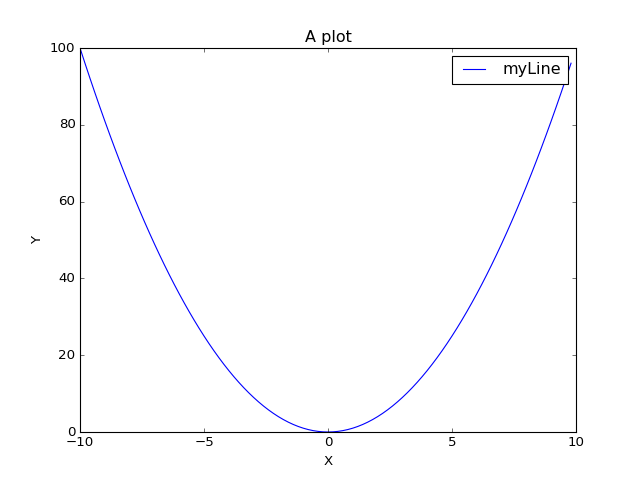

In [42]:
a = scipy.arange(-10,10,0.2)
pylab.plot(a, a**2, label='myLine')
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.title('A plot')
pylab.legend()


In [43]:
#
# Do help(scipy) for more

###################################
# matplotlib
###################################

# I re-learn matplotlib every time I use it... 
# The basic procedure is to look at the matplotlib gallery:
# http://matplotlib.org/examples/pylab_examples/barchart_demo.html
# Pick a graph you like, and edit the code.
#
# Here is a complex example I wrote once:



# make things into a list
def listify(x):
    if hasattr(x, '__iter__'):
        return list(x)
    else:
        return [x]

#  This function is _too long!_  Really, something like this should be split into multiple
#  little functions.  I hope it is something we learn in class

def plot_bars(data, bar_names, group_names, colors, ylabel='',xlabel='',title='', add_bar_labels=True):
    """Data should be [ [(value, low, high)] ] and names is a list of strings.
    
    e.g:

    plot_bars( [ [ 1,1,1,1], [.3,.3,.3,.3], [.1,.1,.1,.1] ], ['Bar1', 'Bar2', 'Bar3'], ['G1','G2','G3','G4'], ['blue','red','green'])"""
    # a bar plot with errorbars
    import scipy
    import matplotlib.pyplot as plt
    
    N = len(group_names)
    ind = scipy.arange(N)  # the x locations for the groups
    width = (1-.3)/len(bar_names)       # the width of the bars
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.set_position([.1,.2,.8,.7])

    legend_data = []
    all_rects = []
    for i,bar_data in enumerate(zip(data,bar_names,colors)):
        d,n,c = bar_data
        if len(listify(d[0])) == 1:
            new_d = []
            for k in range(len(d)):
                new_d.append((d[k],d[k],d[k]))
        else:
            new_d = d
        heights, low, high = zip(*new_d)
        heights = scipy.array(heights)
        low = scipy.array(low)
        high = scipy.array(high)
        low = heights - low
        high = high - heights

        rects = ax.bar(ind+i*width, heights, width, color=c, yerr=[low,high], ecolor='k')
        all_rects += rects
        legend_data.append((rects[0], n))

    # add some labels
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=16)
    ax.set_xticks(ind+len(bar_names)/2.0*width)
    xticklabels = ax.set_xticklabels( group_names )
    plt.setp(xticklabels, rotation=-45) 
    plt.setp(xticklabels, horizontalalignment='left') 

    rects, names = zip(*legend_data) 
    ax.legend( rects, names ) 
    
    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            voffset = max(ax.get_ylim())*.0025
            ax.text(rect.get_x()+rect.get_width()/2., height+voffset, '%.1f'%float(height),
                    ha='center', va='bottom')
    if add_bar_labels:
        autolabel(all_rects)
    for l in xticklabels:
        l.set_fontsize(16)
    fig.canvas.draw()

<IPython.core.display.Javascript object>


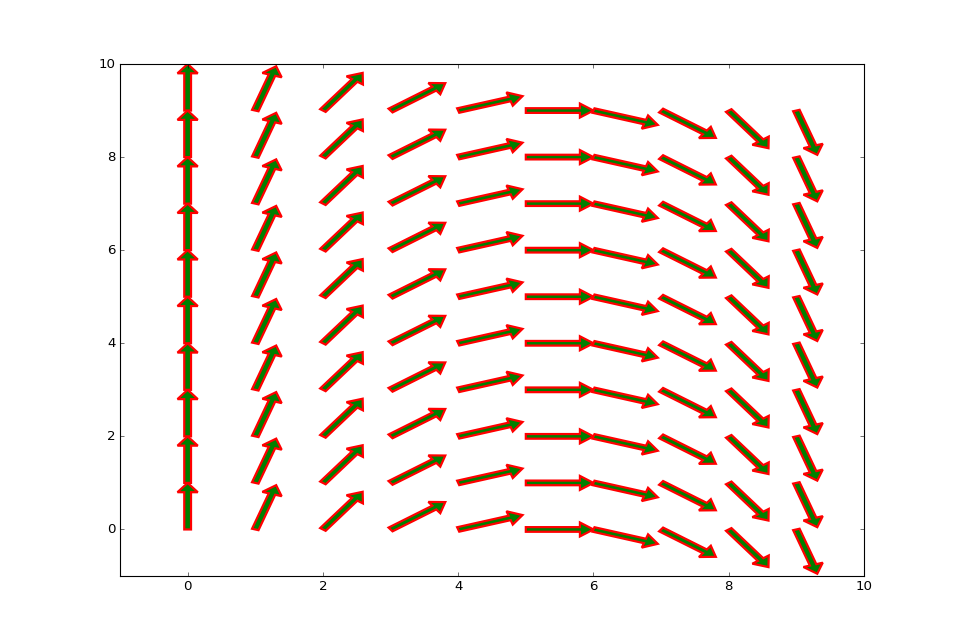

In [44]:
plot_bars( [ [ 1,1,1,1], [.3,.3,.3,.3], [.1,.1,.1,.1] ], ['Bar1', 'Bar2', 'Bar3'], ['G1','G2','G3','G4'], ['blue','red','green'])

In [59]:
import matplotlib.patches

pylab.clf()
ax = pylab.gca()
for x in scipy.arange(10):
    for y in scipy.arange(10):
        anarrow = matplotlib.patches.Arrow(x,y,scipy.sin(scipy.pi*x/10.0),scipy.cos(scipy.pi*x/10.0),0.5,lw=2,fc='green',ec='red')
        ax.add_patch(anarrow)
pylab.xlim(-1,10)
pylab.ylim(-1,10)
pylab.show()

In [51]:
matplotlib.patches.Arrow?

In [57]:
scipy.sin(scipy.pi)

1.2246467991473532e-16